In [1]:
import requests
url = "https://drive.google.com/uc?export=download&id=1cMz6B830MdnSzxHp3pmrNJv_BEykZ2Dc"
r = requests.get(url)
open('clean_seoul.csv', 'wb').write(r.content)

38243285

In [3]:
import pandas as pd
df = pd.read_csv('clean_seoul.csv')

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
df = pd.read_csv("clean_seoul.csv")

print("=" * 70)
print("데이터 불러오기 완료")
print("=" * 70)
print(f"총 레코드 수: {len(df):,}개")
print(f"컬럼 수: {len(df.columns)}개")
print(f"\n데이터 미리보기:")
print(df.head())

데이터 불러오기 완료
총 레코드 수: 80,255개
컬럼 수: 62개

데이터 미리보기:
   Unnamed: 0.1  Unnamed: 0  기준년분기코드 상권구분코드 상권구분코드명     상권코드    상권코드명  \
0             0           0    20241      A    골목상권  3110001   이북5도청사   
1             1           1    20241      A    골목상권  3110001   이북5도청사   
2             2           2    20241      A    골목상권  3110001   이북5도청사   
3             3           3    20241      A    골목상권  3110002  독립문역 1번   
4             4           4    20241      A    골목상권  3110002  독립문역 1번   

    서비스업종코드 서비스업종코드명      월매출금액  ...  연령대20매출건수  연령대30매출건수  연령대40매출건수  \
0  CS100001    한식음식점  385150643  ...        508        935       1997   
1  CS100009  호프-간이주점   11026440  ...          0          0         32   
2  CS200001   일반교습학원   52047765  ...          0          8        152   
3  CS100001    한식음식점  582522265  ...        914       2595       3483   
4  CS100005      제과점  446525280  ...       3589       7446       8867   

   연령대50매출건수  연령대60이상매출건수      상권명    address_name           x          

In [11]:
df['서비스업종코드명'].unique()

array(['한식음식점', '호프-간이주점', '일반교습학원', '제과점', '치킨전문점', '커피-음료', '미용실',
       '의약품', '분식전문점', '예술학원', '스포츠 강습', '세탁소', '일반의류', '일식음식점', '양식음식점',
       '패스트푸드점', '서적', '문구', '화초', '슈퍼마켓', '편의점', '가방', '시계및귀금속',
       '가전제품수리', '인테리어', '중식음식점', '당구장', '자동차수리', '의료기기', '전자상거래업', '철물점',
       '화장품', '애완동물', '여관', '노래방', '핸드폰', '반찬가게', '운동/경기용품', '피부관리실',
       '일반의원', '섬유제품', '가전제품', '가구', '치과의원', '컴퓨터및주변장치판매', '육류판매',
       '골프연습장', '한의원', 'PC방', '네일숍', '안경', '외국어학원', '스포츠클럽',
       '자전거 및 기타운송장비', '청과상', '신발', '조명용품', '자동차미용', '수산물판매', '부동산중개업',
       '미곡판매', '완구'], dtype=object)

In [12]:
# 프로젝트에 필요한 데이터만 추출
# 예: 커피/음료 업종만 분석하는 경우

# 업종 선택 (프로젝트 주제에 맞게 수정)
target_industry = '커피-음료'
df_project = df[df['서비스업종코드명'] == target_industry].copy()

print(f"\n{target_industry} 업종 데이터: {len(df_project)}개")

# 이상치 처리 (선택 사항)
# 예: 월매출이 극단적으로 낮거나 높은 경우
Q1 = df_project['월매출금액'].quantile(0.25)
Q3 = df_project['월매출금액'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_project[(df_project['월매출금액'] < lower_bound) | 
                      (df_project['월매출금액'] > upper_bound)]

print(f"\n이상치: {len(outliers)}개 ({len(outliers)/len(df_project)*100:.1f}%)")
print("이상치 처리 방법 선택:")
print("  1) 제거: 분석에서 제외")
print("  2) 유지: 특별한 케이스로 별도 분석")
print("  → 프로젝트 목적에 따라 결정")

# 새로운 변수 생성 (Feature Engineering)
df_project['총요일매출'] = df_project[['월요일매출금액', '화요일매출금액', 
                                      '수요일매출금액', '목요일매출금액', 
                                      '금요일매출금액']].sum(axis=1)

df_project['총주말매출'] = df_project[['토요일매출금액', '일요일매출금액']].sum(axis=1)

df_project['평일주말비율'] = df_project['총요일매출'] / df_project['총주말매출']

print("\n✓ 새로운 변수 생성 완료")
print("  - 총요일매출")
print("  - 총주말매출")
print("  - 평일주말비율")


커피-음료 업종 데이터: 3957개

이상치: 528개 (13.3%)
이상치 처리 방법 선택:
  1) 제거: 분석에서 제외
  2) 유지: 특별한 케이스로 별도 분석
  → 프로젝트 목적에 따라 결정

✓ 새로운 변수 생성 완료
  - 총요일매출
  - 총주말매출
  - 평일주말비율


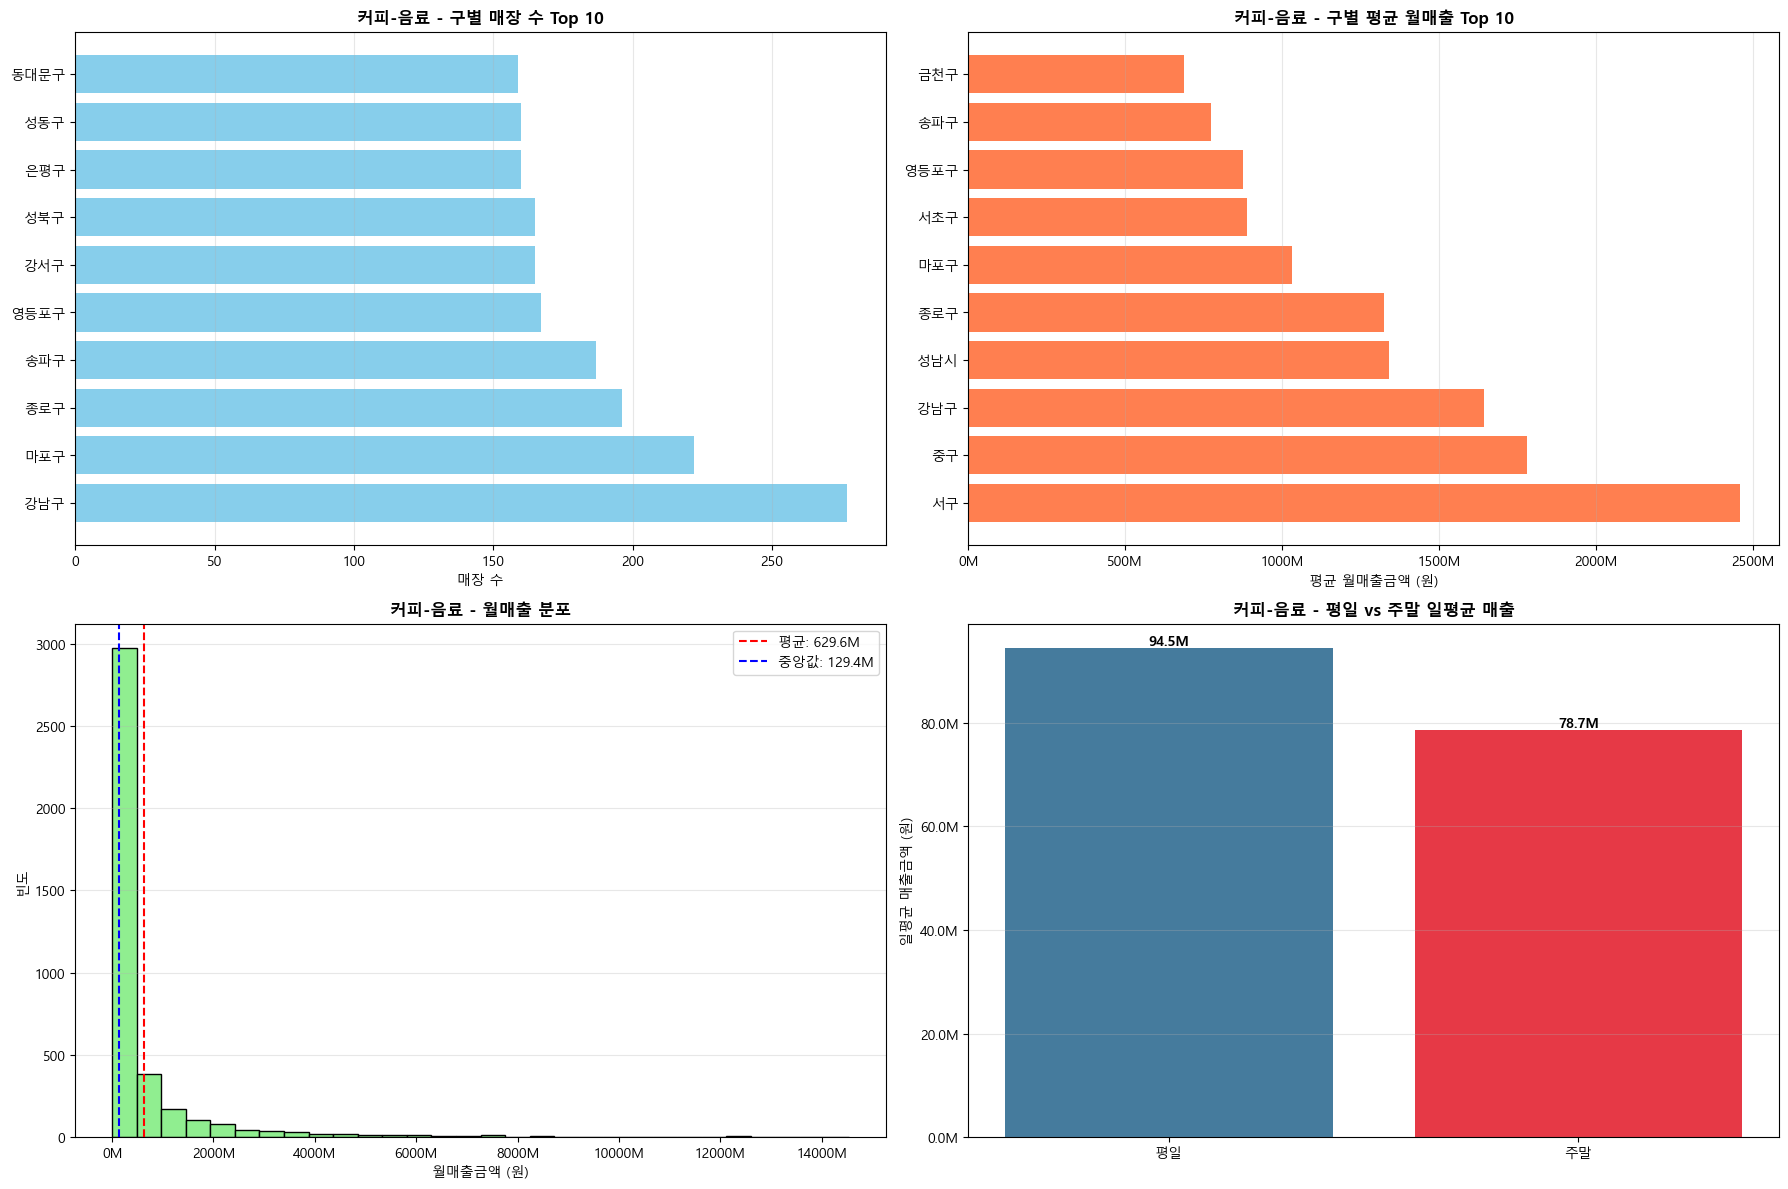

In [13]:
# 1. 지역별 매장 수
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1-1. 구별 매장 수
district_counts = df_project['행정구역명'].value_counts().head(10)
axes[0, 0].barh(range(len(district_counts)), district_counts.values, color='skyblue')
axes[0, 0].set_yticks(range(len(district_counts)))
axes[0, 0].set_yticklabels(district_counts.index)
axes[0, 0].set_title(f'{target_industry} - 구별 매장 수 Top 10', fontweight='bold')
axes[0, 0].set_xlabel('매장 수')
axes[0, 0].grid(axis='x', alpha=0.3)

# 1-2. 구별 평균 매출
district_sales = df_project.groupby('행정구역명')['월매출금액'].mean().sort_values(ascending=False).head(10)
axes[0, 1].barh(range(len(district_sales)), district_sales.values, color='coral')
axes[0, 1].set_yticks(range(len(district_sales)))
axes[0, 1].set_yticklabels(district_sales.index)
axes[0, 1].set_title(f'{target_industry} - 구별 평균 월매출 Top 10', fontweight='bold')
axes[0, 1].set_xlabel('평균 월매출금액 (원)')
axes[0, 1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000000)}M'))
axes[0, 1].grid(axis='x', alpha=0.3)

# 1-3. 매출 분포 히스토그램
axes[1, 0].hist(df_project['월매출금액'], bins=30, color='lightgreen', edgecolor='black')
axes[1, 0].axvline(df_project['월매출금액'].mean(), color='red', linestyle='--', 
                   label=f'평균: {df_project["월매출금액"].mean()/1000000:.1f}M')
axes[1, 0].axvline(df_project['월매출금액'].median(), color='blue', linestyle='--',
                   label=f'중앙값: {df_project["월매출금액"].median()/1000000:.1f}M')
axes[1, 0].set_title(f'{target_industry} - 월매출 분포', fontweight='bold')
axes[1, 0].set_xlabel('월매출금액 (원)')
axes[1, 0].set_ylabel('빈도')
axes[1, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000000)}M'))
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# 1-4. 평일 vs 주말 매출
weekday_weekend_data = pd.DataFrame({
    '구분': ['평일', '주말'],
    '평균매출': [df_project['총요일매출'].mean() / 5,  # 5일로 나눔
                df_project['총주말매출'].mean() / 2]   # 2일로 나눔
})
axes[1, 1].bar(weekday_weekend_data['구분'], weekday_weekend_data['평균매출'], 
               color=['#457B9D', '#E63946'])
axes[1, 1].set_title(f'{target_industry} - 평일 vs 주말 일평균 매출', fontweight='bold')
axes[1, 1].set_ylabel('일평균 매출금액 (원)')
axes[1, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000000):.1f}M'))
axes[1, 1].grid(axis='y', alpha=0.3)

# 값 표시
for i, row in weekday_weekend_data.iterrows():
    axes[1, 1].text(i, row['평균매출'], f"{row['평균매출']/1000000:.1f}M",
                    ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
# plt.savefig('output/7_eda_overview.png', dpi=300, bbox_inches='tight')
plt.show()

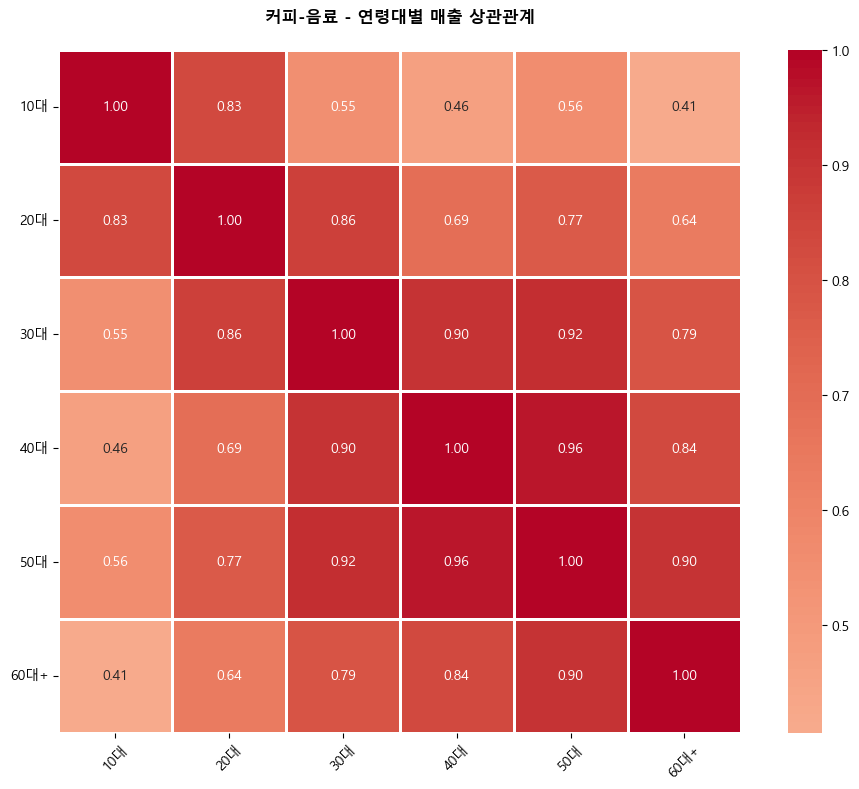


주요 고객층: 30대 (평균 162.1M원)


In [15]:
# 연령대별 매출 상관관계
age_columns = ['10대매출금액', '20대매출금액', '30대매출금액', 
               '40대매출금액', '50대매출금액', '60대이상매출금액']

age_corr = df_project[age_columns].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(age_corr, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, ax=ax)
ax.set_title(f'{target_industry} - 연령대별 매출 상관관계', fontweight='bold', pad=20)

# 축 레이블 간소화
age_labels = ['10대', '20대', '30대', '40대', '50대', '60대+']
ax.set_xticklabels(age_labels, rotation=45)
ax.set_yticklabels(age_labels, rotation=0)

plt.tight_layout()
plt.savefig('output/7_age_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

# 주요 고객층 파악
age_sales_avg = df_project[age_columns].mean()
main_customer = age_labels[age_sales_avg.argmax()]
print(f"\n주요 고객층: {main_customer} (평균 {age_sales_avg.max()/1000000:.1f}M원)")